<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Préparation-des-données" data-toc-modified-id="2.-Préparation-des-données-2">2. Préparation des données</a></span><ul class="toc-item"><li><span><a href="#2.1-Les-datasets-source" data-toc-modified-id="2.1-Les-datasets-source-2.1">2.1 Les datasets source</a></span></li><li><span><a href="#2.2-Traitement-des-données" data-toc-modified-id="2.2-Traitement-des-données-2.2">2.2 Traitement des données</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Analyse-préliminaire-des-données" data-toc-modified-id="2.2.1-Analyse-préliminaire-des-données-2.2.1">2.2.1 Analyse préliminaire des données</a></span><ul class="toc-item"><li><span><a href="#Résultats-de-l'analyse-préliminaire" data-toc-modified-id="Résultats-de-l'analyse-préliminaire-2.2.1.1">Résultats de l'analyse préliminaire</a></span></li></ul></li><li><span><a href="#2.2.2-Filtre-sur-la-période" data-toc-modified-id="2.2.2-Filtre-sur-la-période-2.2.2">2.2.2 Filtre sur la période</a></span></li><li><span><a href="#2.2.3-Hypotéses-sur-les-indicateurs-pertinants" data-toc-modified-id="2.2.3-Hypotéses-sur-les-indicateurs-pertinants-2.2.3">2.2.3 Hypotéses sur les indicateurs pertinants</a></span></li><li><span><a href="#2.2.4-Filtre-sur-les-indicateurs" data-toc-modified-id="2.2.4-Filtre-sur-les-indicateurs-2.2.4">2.2.4 Filtre sur les indicateurs</a></span><ul class="toc-item"><li><span><a href="#A.-Selection-des-indicateurs" data-toc-modified-id="A.-Selection-des-indicateurs-2.2.4.1"><strong>A. Selection des indicateurs</strong></a></span></li><li><span><a href="#B.-Pivotage-du-dataset" data-toc-modified-id="B.-Pivotage-du-dataset-2.2.4.2"><strong>B. Pivotage du dataset</strong></a></span></li><li><span><a href="#C.-Filtre-sur-la-taille-de-la-population,-sur-le-PIB-et-sur-le-nombre-d'utilisateurs-internet" data-toc-modified-id="C.-Filtre-sur-la-taille-de-la-population,-sur-le-PIB-et-sur-le-nombre-d'utilisateurs-internet-2.2.4.3"><strong>C. Filtre sur la taille de la population, sur le PIB et sur le nombre d'utilisateurs internet</strong></a></span></li><li><span><a href="#D.-Traitement-des-valeurs-manquantes" data-toc-modified-id="D.-Traitement-des-valeurs-manquantes-2.2.4.4"><strong>D. Traitement des valeurs manquantes</strong></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#3.-Analyse-des-données" data-toc-modified-id="3.-Analyse-des-données-3">3. Analyse des données</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3.1-Calcul-du-score" data-toc-modified-id="3.1-Calcul-du-score-3.0.1">3.1 Calcul du score</a></span></li></ul></li><li><span><a href="#3.2-Résultats-et-discussion" data-toc-modified-id="3.2-Résultats-et-discussion-3.1">3.2 Résultats et discussion</a></span><ul class="toc-item"><li><span><a href="#3.2.1-Résultats-du-scoring" data-toc-modified-id="3.2.1-Résultats-du-scoring-3.1.1">3.2.1 Résultats du scoring</a></span></li><li><span><a href="#3.2.2-Discussion" data-toc-modified-id="3.2.2-Discussion-3.1.2">3.2.2 Discussion</a></span></li></ul></li><li><span><a href="#3.3-Evolution-du-potentiel" data-toc-modified-id="3.3-Evolution-du-potentiel-3.2">3.3 Evolution du potentiel</a></span></li></ul></li><li><span><a href="#4.-Conclusion" data-toc-modified-id="4.-Conclusion-4">4. Conclusion</a></span></li></ul></div>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)
import seaborn as sns

In [65]:
def last_valid_value(indicator, years = False):
    """
    Cette fonction permet de retourner la valeur non nulle la plus recente (ou son année) d'un array ou d'une série - ou NaN si 
    toutes les valeurs de l'array/serie sont NaN
    
    Args:
    indicator : array ou série pour lequel on veut retrouver la valeur non nulle la plus récente
    years : paramètre optionell, si False la fonction returne la valeur non nulle la plus récente, si
    True elle retourne l'année correspondante
    
    Return:
    La dernière valeur non nulle
    """
    if years:    
        if indicator.last_valid_index() is None:
            return np.nan
        else:
            return indicator.last_valid_index()   
        
    if indicator.last_valid_index() is None:
        return np.nan
    else:
        return indicator[indicator.last_valid_index()]




# 1. Introduction
La mission consiste en une analyse exploratoire pour déterminer si les données sur l’éducation de la banque mondiale fournies (https://datacatalog.worldbank.org/dataset/education-statistics) permettent d’informer le projet d’expansion.
La base des données répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation. 

Ces indicateurs ne sont peut etre pas tous pertinents, il faudra donc filtrer les données pour récupérer et analyser les valeurs des indicateurs les plus importants. De plus, il faudra nettoyer la base des données des doublons et/ou valeurs manquantes.

Enfin, il faudra développer un score pour classer les pays en fonction de leur potentiel de développement commercial.


# 2. Préparation des données 

## 2.1 Les datasets source

5 fichier on ete fournis: 
EdStatsCountry-Series.csv, EdStatsCountry.csv, EdstatsData.csv EdStatsCountry-Series.csv, EdStatsSeries.csv

Pour chaque fichier, on va examiner rapidement son contenu.

In [66]:
#liste des fichier
files = ["EdStatsCountry-Series.csv", "EdStatsCountry.csv", "EdstatsData.csv","EdStatsFootNote.csv", "EdStatsSeries.csv"]
source_path = "Data/Source/"   
shapes = []
columns_names = []
for file in files:
    data = pd.read_csv(source_path + file)
    shapes.append(data.shape)
    columns_names.append(data.columns.values)
#dataframe regroupant des informations sur les fichiers source
pd.DataFrame({"file" :files, "shape": shapes, "columns" : columns_names})


,file,shape,columns
0,EdStatsCountry-Series.csv,"(613, 4)","[CountryCode, SeriesCode, DESCRIPTION, Unnamed: 3]"
1,EdStatsCountry.csv,"(241, 32)","[Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of..."
2,EdstatsData.csv,"(886930, 70)","[Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055,..."
3,EdStatsFootNote.csv,"(643638, 5)","[CountryCode, SeriesCode, Year, DESCRIPTION, Unnamed: 4]"
4,EdStatsSeries.csv,"(3665, 21)","[Series Code, Topic, Indicator Name, Short definition, Long definition, Unit of measure, Periodicity, Base Period, Other notes, Aggregation method, Limitations and exceptions, Notes from original source, General comments, Source, Statistical concept and methodology, Development relevance, Related source links, Other web links, Related indicators, License Type, Unnamed: 20]"


In [67]:
ed_stats_country_series = pd.read_csv(source_path + "EdStatsCountry-Series.csv")
ed_stats_country = pd.read_csv(source_path +"EdStatsCountry.csv")
ed_stats_data = pd.read_csv(source_path +"EdstatsData.csv")
ed_stats_foot = pd.read_csv(source_path +"EdStatsFootNote.csv")
ed_stats_series = pd.read_csv(source_path +"EdStatsSeries.csv")
                        

Pour chaque fichier, on va regarder 3 lignes avec la méthode sample afin de mieux comprendre le contenu des fichiers

In [68]:
ed_stats_country_series.sample(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
172,FRO,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
573,URY,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
489,SRB,SP.POP.0014.TO.ZS,Including Kosovo.,NaN


In [69]:
ed_stats_country.sample(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
177,PRI,Puerto Rico,Puerto Rico,Puerto Rico,PR,U.S. dollar,"Fiscal year end: June 30; reporting period for national accounts data: FY. April 2012 database update: Based on data from the Instituto de Estadísticas de Puerto Rico, national accounts data were revised for 2001 onward.",Latin America & Caribbean,High income: nonOECD,PR,...,NaN,2010,"Reproductive Health Survey (RHS), 1995/96",NaN,Yes,2007,2006.0,NaN,2005,NaN
67,ETH,Ethiopia,Ethiopia,Federal Democratic Republic of Ethiopia,ET,Ethiopian birr,"Fiscal year end: July 7; reporting period for national accounts data: FY. Based on IMF data, national accounts data have been revised for 2000 onward; the new base year is 2011.",Sub-Saharan Africa,Low income,ET,...,General Data Dissemination System (GDDS),2007,"Demographic and Health Survey (DHS), 2011","Expenditure survey/budget survey (ES/BS), 2010/11",NaN,NaN,2009.0,2012.0,2002,NaN
25,BMU,Bermuda,Bermuda,The Bermudas,BM,Bermuda dollar,NaN,North America,High income: nonOECD,BM,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [70]:
ed_stats_data.sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
99884,Algeria,DZA,EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). English. 6th Grade,LO.EGRA.ORF.ENG.6GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641639,Panama,PAN,"Barro-Lee: Average years of total schooling, age 65-69, total",BAR.SCHL.6569,2.92,NaN,NaN,NaN,NaN,3.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340808,France,FRA,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. No Education. Male,PRJ.POP.2529.NED.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4,2.36,2.3,2.23,2.18,2.14,2.12,2.1,2.06,NaN


In [71]:
ed_stats_foot.sample(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
212164,GIN,UIS.NERT.1,YR1991,UNESCO Institute for Statistics (UIS) estimate,NaN
172015,EMU,UIS.ROFST.1.M,YR1987,UNESCO Institute for Statistics (UIS) estimate,NaN
230291,HIC,SE.PRE.ENRR.MA,YR1989,UNESCO Institute for Statistics (UIS) estimate,NaN


In [72]:
ed_stats_series.sample(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1234,LO.PASEC.REA.2.LTR.0T5,Learning Outcomes,PASEC: Distribution of 2nd grade students by average number of letters read accurately in one minute. 0 to 5 Letters,Percentage of 2nd grade students who accurately read 5 or less letters per minute on the PASEC reading assessment. Pupils’ ability to read letters of the alphabet correctly and quickly shows how well pupils have mastered initial letter decoding skills. Data were published for this indicator beginning with PASEC 2014. Consult the PASEC website for more detailed information: http://www.pasec.con...,Percentage of 2nd grade students who accurately read 5 or less letters per minute on the PASEC reading assessment. Pupils’ ability to read letters of the alphabet correctly and quickly shows how well pupils have mastered initial letter decoding skills. Data were published for this indicator beginning with PASEC 2014. Consult the PASEC website for more detailed information: http://www.pasec.con...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Programme d'Analyse des Systèmes Educatifs de la CONFEMEN/Program for the Analysis of CONFEMEN Education Systems (PASEC): http://www.pasec.confemen.org/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3434,UIS.ROFST.H.1.Q5,Education Equality,"UIS: Rate of out-of-school children of primary school age, richest quintile, both sexes (household survey data) (%)","Number of children of official primary school age who did not attend primary or secondary school at any time during the reference academic year, expressed as a percentage of the number of official primary school age children in the household survey sample. Children attending pre-primary or non-formal education are considered out of school. The UNESCO Institute for Statistics (UIS) releases est...","Number of children of official primary school age who did not attend primary or secondary school at any time during the reference academic year, expressed as a percentage of the number of official primary school age children in the household survey sample. Children attending pre-primary or non-formal education are considered out of school. The UNESCO Institute for Statistics (UIS) releases est...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285,LO.PIAAC.LIT.3,Learning Outcomes,PIAAC: Adults by literacy proficiency level (%). Level 3,"Percentage of adults scoring 276 to less than 326 points on the 0 to 500 point scale. Texts at this level are often dense or lengthy, and include continuous, non-continuous, mixed, or multiple pages of text. Understanding text and rhetorical structures become more central to successfully completing tasks, especially navigating complex digital texts. Tasks require the respondent to identify, in...","Percentage of adults scoring 276 to less than 326 points on the 0 to 500 point scale. Texts at this level are often dense or lengthy, and include continuous, non-continuous, mixed, or multiple pages of text. Understanding text and rhetorical structures become more central to successfully completing tasks, especially navigating complex digital texts. Tasks require the respondent to identify, in...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,OECD Programme for the International Assessment of Adult Competencies (PIAAC),NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour résumer le contenu des fichiers : "EdStatsCountry-Series.csv", "EdStatsCountry.csv", "EdstatsData.csv","EdStatsFootNote.csv", "EdStatsSeries.csv"
- EdStatsCountry-Series.csv renseigne, pour un pays et indicateur donné, la source des données ou comment les données ont été obtenues
- EdStatsCountry.csv contient des informations sur les pays comme leur nom et code, région géographique, date du dernier census, etc.
- EdstatsData.csv contient, pour chaque pays, indicateur et année, la valeur de l'indicateur. Il s'agit donc du fichier essentiel pour réaliser l'analyse quantitative
- EdStatsFootNote.csv ne contient pas des informations essentielles ou qui ne peuvent pas être trouvées dans d'autres fichiers : pour chaque ligne on a le code du pays, le code de l'indicateur (chaque indicateur est identifié par un code bien précis) et des informations généralistes sur l'indicateur
- EdStatsSeries.csv contient les détails sur les indicateurs : code, description courte et longue, source des données etc. Il s'agit donc d'un fichier important pour réaliser une première sélection d'indicateurs


## 2.2 Traitement des données
Comme mentionné précédemment, on va s'intéresser essentiellement au fichier EdStatsData.csv; on va appeler les du fichier tout simplement "data"

### 2.2.1 Analyse préliminaire des données

In [73]:
#lecture des données  
data = pd.read_csv("Data\Source\EdstatsData.csv")

In [74]:
data.sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
602028,Netherlands,NLD,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Bamanankan. 2nd Grade,LO.EGRA.CWPM.ZERO.BMN.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47475,Low & middle income,LMY,Wittgenstein Projection: Percentage of the population age 25-29 by highest level of educational attainment. Incomplete Primary. Female,PRJ.ATT.2529.S1.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783309,Switzerland,CHE,SABER: (Education Management Information Systems) Policy Goal 3 Lever 1: Methodological Soundness,SABER.EMIS.GOAL3.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#nombre de lignes et colonnes
data.shape

(886930, 70)

In [76]:
#type des données 
data.dtypes.value_counts()

float64    66
object      4
dtype: int64

In [77]:
#premieres 5 lignes
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#liste pays/zones géographiques
data["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


En examinant la liste des noms des pays, on peut remarquer que le dataset contient des données pour des pays individuels, mais aussi pour des agrégations (par exemple Arab Worls,   revenu - high ou low income etc.) 

Le focus ici sont les pays à fort potentiel pour un développement commercial, plutôt que les régions géographiques. L'idée est alors de filtrer sur les pays individuels. Pour ce faire, on va regarder le fichier "EdStatsCountry.csv", dont la colonne "Region" ne renseigne la région géographique que pour les pays individuels, pas pour les agrégations.

In [79]:
#identification des régions geographiques et visualisation de 3 parmi elles
aggregations = ed_stats_country[ed_stats_country["Region"].isna()]
aggregations.sample(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
234,WLD,World,World,World,1W,NaN,World aggregate.,NaN,NaN,1W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,UMC,Upper middle income,Upper middle income,Upper middle income,XT,NaN,"Upper middle income group aggregate. Upper-middle-income economies are those in which 2013 GNI per capita was between $4,126 and $12,745.",NaN,NaN,XT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NAC,North America,North America,North America,XU,NaN,North America regional aggregate. There are no economies in North America classified as low or middle income.,NaN,NaN,XU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#nom des agrégation/régions géographiques
data_regions= data[data["Country Code"].isin(aggregations["Country Code"].values)]
data_regions["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Gibraltar', 'Nauru'], dtype=object)

On peut remarquer qu'en effet on retrouve les régions géographiques ou les agrégations. 
On retrouve aussi Gibraltar et Nauru, mais il s'agit de pays tellement petits qu'on peut déjà les exclures des pays d'intéret.
L'étape suivante est filtrer le dataset source pour n'obtenir que les pays individuels.

In [81]:
#filtre de données 
data = data[~data["Country Code"].isin(aggregations["Country Code"].values)]
data.sample(3)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
385891,Guinea,GIN,EGRA: Reading Comprehension - Share of students with a zero score (%). Amharic. 3rd Grade,LO.EGRA.READ.0.AMH.3GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853614,Uruguay,URY,"UIS: Total net attendance rate, lower secondary, second quintile, gender parity index (GPI)",UIS.NART.2.Q2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638809,Palau,PLW,EGRA: Reading Comprehension - Share of students with a zero score (%). Lunda. 2nd Grade,LO.EGRA.READ.0.LUN.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#nombre des lignes et colonnes
data.shape

(787975, 70)

In [83]:
#longeur de la liste de pays
data["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fij

In [84]:
#longeur de la liste d'indicateurs
len(data["Indicator Name"].unique())

3665

In [85]:
#comptage des valeurs nulls
data.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              719412
                   ...  
2085              736847
2090              736847
2095              736847
2100              736847
Unnamed: 69       787975
Length: 70, dtype: int64

In [86]:
#comptage des doublons
data.duplicated().sum()

0

In [87]:
#pourcentage valeurs nulles dans le dataframe
data.isna().sum().sum()/(data.shape[0]*data.shape[1])

0.8560259797945003

#### Résultats de l'analyse préliminaire
Le dataset initial contenait 886930 lignes et 70 colonnes. Les colonnes renseignent le nom et le code du pays (ou de la région géographique), le nom et le code des indicateurs, et les années (de 1970 à 2100). Ainsi, chaque ligne représente les valeurs de l'indicateur, à partir de 1970, pour un certain pays. La valeur de l'indicateur peut être une valeur numérique - si l’indicateur a été mesuré pour tel pays et pour telle année - ou NaN dans le cas contraire. 

Un premier filtre a permis de ne garder que les pays individuels, sans régions géographiques. Le dataset filtré contient 215 pays , et pour chacun d’entre eux il y a 3665 indicateurs. En effet, 215*3665 = 787975, ce qui correspond au nombre des lignes du dataset (dans le monde il y a 195 pays reconnus, le fait que la on en a 215 pourrait etre en raisons de pays non reconnus ou de pays qui étaient divisés et qui ont ensuite été réunis).

Le dataset ne contient pas de doublons, mais contient beaucoup de valeurs manquantes. En effet, les indicateurs ne sont pas mesurés tous les ans et certains indicateurs pourraient être mesurés dans un pays et pas un autre.

Etant donnés que le la plage temporelle du dataset est très large et les indicateurs ne sont pas tous pertinents, il ne serait pas pertinent d’analyser toutes les valeurs manquantes sur l’ensemble du dataset. Un filtrage sur les années et sur les indicateurs est donc nécessaire. 


### 2.2.2 Filtre sur la période

Afin d’identifier des pays à fort potentiel pour un développement commercial, je vais m'intéresser à une plage temporelle comprise entre 2012 et 2032 (+- 10 ans). En effet, les changements sociétaux, géopolitiques et économiques pourraient fortement impacter les indicateurs et j’aimerais baser mon analyse sur des indicateurs qui se rapprochent le plus possible avec la situation actuelle. 

J’ai décidé de garder les données à partir de 2012 pour m’assurer d’avoir assez de valeurs pour des analyses statistiques significatives. Cela permet aussi d'éviter la période de crise économique 2007-2008 et les années immédiatement successives à cette crise. Dans la suite (cf. 2.2.3.B - Pivotage du Dataset), je vais considérer la dernière valeur non nulle pour un indicateur (la dernière année pour laquelle une valeure a été mesurée et la valeur correspondante).

Parmi les indicateurs, il existe également des projections, c’est-à-dire des prédictions des valeurs futures. Il s’agit notamment des Wittgenstein projections (http://dataexplorer.wittgensteincentre.org/wcde-v2/)

Par exemple, un indicateur Wittgenstein intéressant pourrait être le nombre moyen d’années passées à l’école (plus ce nombre est élevé, plus le nombre de potentiels clients sera élevé). 
D’auprès le site internet du centre Wittgenstein et aussi une vérification sur le dataset, ces projections sont réalisées avec un intervalle de 5 ans (p.e : 2000, 2005, 2010, etc.)

Je vais donc considérer les indicateurs à l’horizon 2030 pour les raisons suivantes :

- Les estimations trop loin dans le temps pourraient ne pas être fiables
- Je considere un développement commercial dans le court/moyen terme
 

In [88]:
#trouver l'index de la colonne avec les données relatives au 2012
start = data.columns.get_loc("2012")

In [89]:
#années presents dans le dataset à partir de 2012
data.columns[start:]

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030',
       '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075',
       '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69'],
      dtype='object')

NB: Il n'y a pas des données pour 2018 et 2019 et ensuite on a des données tous les 5 ans

In [90]:
#trouver l'index de la colonne avec les données relatives au 2030
end = data.columns.get_loc("2030")

In [91]:
#nouveau dataframe qui ne garde que les années selectionnées 
data = pd.concat([data.iloc[:, [0,1,2,3]], data.iloc[:, start: end+1]], axis = 1)

In [92]:
data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2020,2025,2030
151623,Barbados,BRB,"Gross graduation ratio from primary education, male (%)",SE.PRM.CMPL.MA.ZS,NaN,NaN,94.542702,NaN,NaN,NaN,NaN,NaN,NaN
472132,"Korea, Rep.",KOR,TIMSS: Distribution of 8th Grade Science Scores: 5th Percentile Score,LO.TIMSS.SCI8.P05,NaN,NaN,NaN,423.0,NaN,NaN,NaN,NaN,NaN
880201,Zambia,ZMB,DHS: Primary completion rate. Male,HH.DHS.PCR.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804451,Togo,TGO,PASEC: Mean performance on the language scale for 2nd grade students who attended pre-primary education,LO.PASEC.REA.2.PP,NaN,NaN,520.600000,NaN,NaN,NaN,NaN,NaN,NaN
562773,"Micronesia, Fed. Sts.",FSM,Percentage of students in lower secondary vocational education who are female (%),UIS.FEP.2.V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
#analyse des Wittgenstein projections
witt = data[data["Indicator Name"].str.contains("Witt")]
witt.sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2020,2025,2030
285859,Czech Republic,CZE,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Female,PRJ.POP.ALL.3.FE,NaN,NaN,NaN,3151.14,NaN,NaN,3230.82,3325.28,3420.72
259993,"Congo, Rep.",COG,Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Incomplete Primary. Total,PRJ.ATT.2039.S1.MF,NaN,NaN,NaN,0.13,NaN,NaN,0.11,0.09,0.08
237922,Channel Islands,CHI,Wittgenstein Projection: Mean years of schooling. Age 20-39. Female,PRJ.MYS.2039.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#verification qu'on a bien des Wittgenstein projections en 2030
witt["2030"].count()

51128

### 2.2.3 Hypotéses sur les indicateurs pertinants
L’hypothèses principale pour identifier les indicateurs pertinents a été la suivante :
les pays avec un pourcentage élevé de jeunes qui fréquentent le lycée ou l’université (upper secondary ou tertiary education, en anglais dans le dataset) seront des pays a fort potentiel de développement. Ainsi, à l'aide du fichier EdStatsSeries et du site  https://datacatalog.worldbank.org/search/dataset/0038480, j’ai identifié des indicateurs qui quantifient ce type de données.

Je n’ai pas considéré le taux de scolarisation à l'école primaire ou au collège en raison du décrochage scolaire : pas tous élevés qui terminent l'école primaire ou le collège continueront les études. Aussi, je n’ai pas considéré le pourcentage de population qui a atteint un certain niveau d’éducation ou encore le nombre moyen d’années d’éducation : je pense que ce type d’indicateur comporte le risque de donner des informations sur le passé et non pas sur le présent (par exemple, dans le pays en phase de fort développement économique, les nouvelles générations seront beaucoup plus scolarisées par rapport à la génération de leurs parents). 

J’ai considéré également 
- les NEET (Not in Education, Employment or Training), qui pourrait avoir une contribution négative au  « scoring » des pays
- le nombre d’ordinateurs pour 100 habitants  (posséder un ordinateur est important pour pouvoir suivre des cours en ligne)
- le nombre d'utilisateurs internet (l'accès à internet est fondamental pour les cours en ligne)
- la croissance démographique : plus la population va croitre, plus il y aura des jeunes qui vont aller au lycée et/ou à l’université 
- la school life expectancy (nombre d'années qu'une personne en âge d'entrer à l'école peut s'attendre à passer dans le niveau d'enseignement spécifié)
- les Wittgenstein projections nommées précédemment
- la taille de la population jeune (entre 10 et 24 ans) et la taille de la population totale
- le produit intérieur brut par habitant (GDP per capita): plus un pays est riche, plus il y aura des personnes prêtes à payer des cours en ligne

Sauf pour la taille de la population, je n’ai considéré que des indicateurs qui expriment des pourcentages. Cela permet de comparer les pays indépendamment de la taille de leur population. 
 

### 2.2.4 Filtre sur les indicateurs

#### **A. Selection des indicateurs**
A partir du fichier EdStatsSeries.csv j’ai sélectionné des indicateurs en me basant sur les hypothèses décrites ci-dessus. 

In [95]:
#lecture du fichier avec les indicateurs
indicators = pd.read_csv("Data\Source\EdStatsSeries.csv")

In [96]:
#indicateurs
upper_secondary_enrollement = indicators.loc[2313, "Series Code"]
tertiary_enrollement = indicators.loc[2335, "Series Code"]
neet = indicators.loc[2397, "Series Code"]
computer = indicators.loc[610, "Series Code"]
internet = indicators.loc[611, "Series Code"]
population_growth = indicators.loc[2589, "Series Code"]
school_life_exp_post_second = indicators.loc[3499, "Series Code"]
school_life_exp_second = indicators.loc[3495, "Series Code"]
school_life_exp_tertiary = indicators.loc[3503, "Series Code"]
wittgenstein_proj_schooling_15_19 = indicators.loc[1889, "Series Code"]
wittgenstein_proj_schooling_20_24 =indicators.loc[1896, "Series Code"]
population_15_19 = indicators.loc[30]["Series Code"]
population_20_24 = indicators.loc[34]["Series Code"]
population_15_24 = indicators.loc[2506]["Series Code"]
population_10_18 = indicators.loc[2461]["Series Code"]
population_total = indicators.loc[2590]["Series Code"]
gdp_per_capita = indicators.loc[1662]["Series Code"]

In [97]:
selected_indicators = [
    upper_secondary_enrollement,
    tertiary_enrollement,
    neet,
    computer,
    internet,
    population_growth,
    school_life_exp_post_second,
    school_life_exp_second,
    school_life_exp_tertiary,
    wittgenstein_proj_schooling_15_19, 
    wittgenstein_proj_schooling_20_24,
    population_15_19,
    population_20_24,
    population_15_24,
    population_10_18,
    population_total,
    gdp_per_capita] 

selected_indicators


['SE.SEC.ENRR.UP',
 'SE.TER.ENRR',
 'SL.UEM.NEET.ZS',
 'IT.CMP.PCMP.P2',
 'IT.NET.USER.P2',
 'SP.POP.GROW',
 'UIS.SLE.4',
 'UIS.SLE.23',
 'UIS.SLE.56',
 'PRJ.MYS.1519.MF',
 'PRJ.MYS.2024.MF',
 'BAR.POP.1519',
 'BAR.POP.2024',
 'SP.POP.1524.TO.UN',
 'SP.POP.1018.TO.UN',
 'SP.POP.TOTL',
 'NY.GDP.PCAP.CD']

In [98]:
#liste des indicateurs selectionnés avec leurs description
indicators[indicators["Series Code"].isin(selected_indicators)][["Indicator Name", "Long definition"]]


,Indicator Name,Long definition
30,"Barro-Lee: Population in thousands, age 15-19, total","Population in thousands, age 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee."
34,"Barro-Lee: Population in thousands, age 20-24, total","Population in thousands, age 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee."
610,Personal computers (per 100 people),Personal computers are self-contained computers designed to be used by a single individual.
611,Internet users (per 100 people),"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."
1662,GDP per capita (current US$),GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U...
1889,Projection: Mean years of schooling. Age 15-19. Total,"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For..."
1896,Projection: Mean years of schooling. Age 20-24. Total,"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For..."
2313,"Gross enrolment ratio, upper secondary, both sexes (%)","Total enrollment in upper secondary education, regardless of age, expressed as a percentage of the total population of official upper secondary education age."
2335,"Gross enrolment ratio, tertiary, both sexes (%)","Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving."
2397,"Share of youth not in education, employment or training, total (% of youth population)","Share of youth not in education, employment or training (NEET) is the proportion of young people who are not in education, employment, or training to the population of the corresponding age group: youth (ages 15 to 24); persons ages 15 to 29; or both age groups."


In [99]:
#filtre sur les indicateurs selectionnés et reset des index à 0
data_filter_indicators = data.loc[data["Indicator Code"].isin(selected_indicators)].reset_index(drop = True)
data_filter_indicators
#sauvegarde du dataframe dans un nouveau fichier pour ne pas repeter les ètapes à chaque fois
data_filter_indicators.to_csv("Data/Cleaning/data_filter_indicators.csv", index = False)


#### **B. Pivotage du dataset**

L'idée ici est de rendre le dataset plus lisible et le mettre dans une forme qui facilite les analyses statistiques.

In [100]:
#lecture du dataset filtré
data_filter_indicators = pd.read_csv("Data/Cleaning/data_filter_indicators.csv")
data_filter_indicators.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2020,2025,2030
1004,El Salvador,SLV,"Barro-Lee: Population in thousands, age 20-24, total",BAR.POP.2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2292,Myanmar,MMR,"Share of youth not in education, employment, or training, total (% of youth population)",SL.UEM.NEET.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1847,Lebanon,LBN,"School life expectancy, post-secondary non-tertiary, both sexes (years)",UIS.SLE.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,Kiribati,KIR,"School life expectancy, secondary, both sexes (years)",UIS.SLE.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3617,"Yemen, Rep.",YEM,"School life expectancy, tertiary, both sexes (years)",UIS.SLE.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Daun une première étape, on va utiliser la fonction <font color = 'red'>last_valid_value</font> pour recuper 
- l'index de la colonne de la dernière valeur non nulle, c'est à dire l'année
- la valeur correspondante

In [101]:
#ici on utilise la fonction last_valid_value pour recuperer l'année de mesure la plus recente
last_valid_data = data_filter_indicators.iloc[:, 4:].apply(last_valid_value, args = [True], axis = 1)
#comptage de valeur par anné,triés par année
last_valid_data.value_counts().sort_index()

2012     99
2013    134
2014    314
2015    583
2016    822
2030    332
dtype: int64

In [102]:
#comptage valeurs nulles dans le dataset
last_valid_data.isna().sum()

1371

In [103]:
#pourcentage valeurs nulles
last_valid_data.isna().sum()/(last_valid_data.value_counts().sum()+ last_valid_data.isna().sum())

0.3751025991792066

On remarque ici que, sauf pour l'année 2030, les valeurs les plus récentes datent entre 2012 et 2016. J'aurais préféré des valeurs plus récentes, mais les indicateurs ne sont pas mesurés tous les ans. De plus, dans les colonnes du dataset de depart, on passait de 2017 à 2020 et il n'y avait aucune donnée relative à 2018 ou 2019.
Avant de proceder, je vais effectuer deux vérifications:
- les indicateurs mesurés en 2020 ne sont pas pertinents
- les données relatives à 2030 contiennent exlusivement les Wittgenstein projections

In [104]:
last_valid_data.value_counts().sum()

2284

In [105]:
#nom des indicateurs mesurés en 2020
data_filter_indicators[~data_filter_indicators["2020"].isna()]["Indicator Name"].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total'],
      dtype=object)

En effet, pour l'année 2020, il n'y a que les Wittgenstein projections

In [106]:
#vérification que sur le dataset filtré, l'année 2030 contient exclusivement des Wittengstein projections
data_filter_indicators[~data_filter_indicators["2030"].isna()]["Indicator Name"].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total'],
      dtype=object)

En 2030 il n'y a que les Wittgenstein projections

Maintenant, je vais appliquer la fonction <font color = 'red'>last_valid_value</font> aux colonnes pour recuper la derniere valeur non nulle, et pivoter le dataframe pour avoir les indicateurs en colonne

In [107]:
#application de last_valid_value au dataframe
last_valid_data = data_filter_indicators.iloc[:, 4:].apply(last_valid_value, axis = 1)
data_filter_indicators_last_valid =  pd.concat([data_filter_indicators.iloc[:, [0,1,2,3]], last_valid_data], axis = 1)

In [108]:
data_filter_indicators_last_valid.sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,0
3350,Turkmenistan,TKM,"Barro-Lee: Population in thousands, age 20-24, total",BAR.POP.2024,NaN
3453,United Kingdom,GBR,GDP per capita (current US$),NY.GDP.PCAP.CD,4.034141e+04
1268,Greece,GRC,"Population, total",SP.POP.TOTL,1.074674e+07


In [109]:
data_filter_indicators_last_valid.rename(columns = {0: "Last Valid Value"})
data_filter_indicators_last_valid.rename(columns = {0: "Last Valid Value"}).sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Last Valid Value
3214,Tanzania,TZA,"Barro-Lee: Population in thousands, age 20-24, total",BAR.POP.2024,NaN
2356,New Caledonia,NCL,"Population, total",SP.POP.TOTL,278000.0
1021,Equatorial Guinea,GNQ,"Barro-Lee: Population in thousands, age 20-24, total",BAR.POP.2024,NaN


In [110]:
#pivot
data_filter_indicators_last_valid = data_filter_indicators_last_valid.pivot(index=['Country Name', 'Country Code'], columns='Indicator Name', values = 0)

In [111]:
data_filter_indicators_last_valid.sample(3)

,Indicator Name,"Barro-Lee: Population in thousands, age 15-19, total","Barro-Lee: Population in thousands, age 20-24, total",GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, post-secondary non-tertiary, both sexes (years)","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)","Share of youth not in education, employment, or training, total (% of youth population)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
Country Name,Country Code,,,,,,,,,,,,,,,,,
Uganda,UGA,NaN,NaN,580.383539,4.760820,NaN,21.876170,NaN,3.290872,8939170.0,8244246.0,41487965.0,0.05788,1.70423,NaN,NaN,7.3,8.3
Tunisia,TUN,NaN,NaN,3688.646375,34.606579,77.870216,50.879675,NaN,1.142911,1467012.0,1800366.0,11403248.0,NaN,6.13427,1.72918,NaN,9.3,12.6
Papua New Guinea,PNG,NaN,NaN,2500.091116,NaN,22.367001,9.601538,NaN,2.064027,1548449.0,1538799.0,8084991.0,NaN,2.42078,NaN,NaN,NaN,NaN


In [112]:
#split de l'index en country name et country code, ça sera utile pour la suite
data_filter_indicators_last_valid["Country Code"] = [data_filter_indicators_last_valid.index[i][1] for i in range(data_filter_indicators_last_valid.shape[0])]
data_filter_indicators_last_valid.index = [data_filter_indicators_last_valid.index[i][0] for i in range(data_filter_indicators_last_valid.shape[0])]


In [113]:
data_filter_indicators_last_valid.sample(3)

Indicator Name,"Barro-Lee: Population in thousands, age 15-19, total","Barro-Lee: Population in thousands, age 20-24, total",GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, post-secondary non-tertiary, both sexes (years)","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)","Share of youth not in education, employment, or training, total (% of youth population)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code
St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980353,NaN,NaN,31264.0,NaN,NaN,NaN,NaN,NaN,NaN,MAF
Guyana,NaN,NaN,4529.139412,12.48062,83.277496,35.660000,NaN,0.621217,135366.0,134890.0,773303.0,0.06509,4.48743,0.62403,NaN,9.3,10.8,GUY
Afghanistan,NaN,NaN,561.778746,8.66280,42.613129,10.595726,NaN,2.689163,7743486.0,7252785.0,34656032.0,0.23646,3.38414,0.43314,NaN,NaN,NaN,AFG


In [114]:
#sauvegarde
data_filter_indicators_last_valid.to_csv("Data/Cleaning/SelectedData.csv")

#### **C. Filtre sur la taille de la population, sur le PIB et sur le nombre d'utilisateurs internet**

L'idée ici est d'exclure du dataset les pays avec une population trop petite, avec un PIB trop petit et avec trop peu d'utilisateurs internet. Avant de ce faire, il est nécessaire d'analyser ces indicateurs.

In [115]:
#lecture données et renomagge d'une colonne
selected_data = pd.read_csv("Data/Cleaning/SelectedData.csv")
selected_data.rename(columns = {"Unnamed: 0" : "Country Name"}, inplace=True)
#nombre des lignes et colonnes du dataframe
selected_data.shape

(215, 19)

In [116]:
#informations statistiques sur la taille de la population
selected_data["Population, total"].describe()

count    2.130000e+02
mean     3.480119e+07
std      1.356487e+08
min      1.109700e+04
25%      8.987600e+05
50%      6.344722e+06
75%      2.369592e+07
max      1.378665e+09
Name: Population, total, dtype: float64

Text(0, 0.5, 'Nombre des pays')

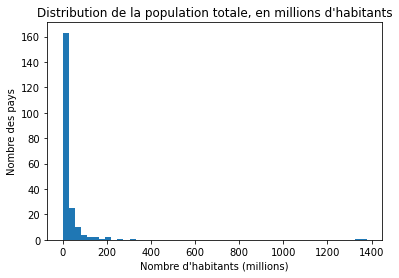

In [117]:
#distibution de la taille de population
plt.hist(selected_data["Population, total"]/1000000, bins = 50)
plt.title("Distribution de la population totale, en millions d'habitants")
plt.xlabel("Nombre d'habitants (millions)")
plt.ylabel("Nombre des pays")

In [118]:
#Pays avec la plus grande population
selected_data.sort_values("Population, total", ascending = False).loc[:, ["Country Name","Population, total"]].head(10)

,Country Name,"Population, total"
41,China,1.378665e+09
87,India,1.324171e+09
204,United States,3.231275e+08
88,Indonesia,2.611155e+08
26,Brazil,2.076529e+08
146,Pakistan,1.932035e+08
142,Nigeria,1.859896e+08
15,Bangladesh,1.629516e+08
158,Russian Federation,1.443424e+08
126,Mexico,1.275404e+08


La moyenne est de 34.801187 millions et la mediane est 6.344722 millions. Cela indique une forte asymettrie des données. En effet, Inde e Chine on autour de 4 fois la population du troisième pays le plus peuplé, les Etats Unis. 


In [119]:
#informatons statistiques sur le PIB par habitant
selected_data["GDP per capita (current US$)"].describe()

count       200.000000
mean      15161.715887
std       22143.396359
min         285.727442
25%        1979.163102
50%        5355.750775
75%       17778.160754
max      168146.015281
Name: GDP per capita (current US$), dtype: float64

Text(0, 0.5, 'Nombre des pays')

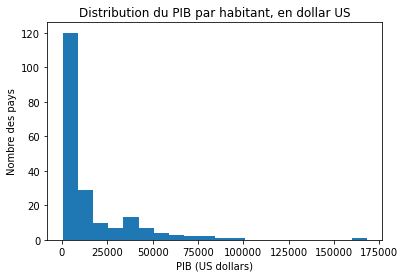

In [120]:
#distibution du PIB
plt.hist(selected_data["GDP per capita (current US$)"], bins = 20)
plt.title("Distribution du PIB par habitant, en dollar US")
plt.xlabel("PIB (US dollars)")
plt.ylabel("Nombre des pays")

La moyenne du PIB par habitant est de 15161 dollars et la mediane est 5355 dollars. Cela indique une forte asymettrie des données, ce qui est confirmé par l'histogramme.

In [121]:
#informations statistiques sur les utilisateurs internet
selected_data["Internet users (per 100 people)"].describe()

count    202.000000
mean      51.058794
std       28.608806
min        0.000000
25%       25.276262
50%       53.613386
75%       76.160053
max       98.240016
Name: Internet users (per 100 people), dtype: float64

Text(0, 0.5, 'Nombre des pays')

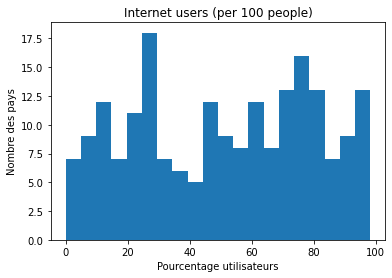

In [122]:
#distibution des utilisateurs interent
plt.hist(selected_data["Internet users (per 100 people)"], bins = 20)
plt.title("Internet users (per 100 people)")
plt.xlabel("Pourcentage utilisateurs")
plt.ylabel("Nombre des pays")

Dans le cas d'utilisateurs internet, la distribution est beaucoup plus uniforme.

En considerant l'asymétrie des données en ce qui concerne PIB et taille de la population, je vais reduire le dataset en filtrant avec la médiane plutot que avec la moyenne. Je vais également utiliser la médiane pour les utilisateurs internet.


In [123]:
#filtre sur les pays avec un PIB plus élévé que la mediane, une popolation plus élévée que la mediane et un porcentage d'utilisateurs internet plus élévé que la médiane

selected_data = selected_data[(selected_data["Population, total"] > selected_data["Population, total"].median())&
                              (selected_data["GDP per capita (current US$)"] > selected_data["GDP per capita (current US$)"].median())&
                              (selected_data["Internet users (per 100 people)"] > selected_data["Internet users (per 100 people)"].median())
                             ]



In [124]:
selected_data.shape

(39, 19)

Avec le filtre, la liste des pays est reduite à 39 pays

In [125]:
# pourcentage valeurs manquantes
selected_data.isna().sum().sum()/(39*17)

0.2579185520361991

In [126]:
#sauvegarde dataframe
selected_data.to_csv("Data/Cleaning/SelectedData_39.csv", index = False)

#### **D. Traitement des valeurs manquantes**

In [127]:
#lecture données et renomagge d'une colonne
selected_data_39 = pd.read_csv("Data/Cleaning/SelectedData_39.csv")
#nombre des lignes et colonnes du nouveau dataframe
selected_data_39.shape

(39, 19)

In [128]:
selected_data_39.sample(5)

,Country Name,"Barro-Lee: Population in thousands, age 15-19, total","Barro-Lee: Population in thousands, age 20-24, total",GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, post-secondary non-tertiary, both sexes (years)","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)","Share of youth not in education, employment, or training, total (% of youth population)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code
38,"Venezuela, RB",NaN,NaN,15692.412878,NaN,78.629623,60.000000,NaN,1.317057,5069729.0,5479911.0,31568179.0,NaN,4.59887,NaN,NaN,9.9,11.3,VEN
27,Romania,NaN,NaN,9519.876801,53.220219,91.628181,59.503951,NaN,-0.557582,1929215.0,2247187.0,19705301.0,0.63149,7.58074,2.50323,19.1,8.6,11.4,ROU
9,Czech Republic,NaN,NaN,18491.940112,64.966713,109.673653,76.481201,NaN,0.147567,822381.0,1063674.0,10561633.0,0.52397,8.13401,3.11042,NaN,11.0,13.3,CZE
1,Australia,NaN,NaN,49927.819509,90.306503,186.427887,88.238658,NaN,1.410064,2440747.0,2914620.0,24127159.0,0.79496,7.89545,4.26626,NaN,12.5,14.1,AUS
14,Greece,NaN,NaN,17930.164229,113.871788,111.409348,69.087915,NaN,-0.687543,948267.0,1114005.0,10746740.0,NaN,6.41748,4.88185,NaN,10.5,12.5,GRC


In [129]:
#comptage valeurs manquantes par indicateur
selected_data_39.isna().sum()

Country Name                                                                                0
Barro-Lee: Population in thousands, age 15-19, total                                       39
Barro-Lee: Population in thousands, age 20-24, total                                       39
GDP per capita (current US$)                                                                0
Gross enrolment ratio, tertiary, both sexes (%)                                             3
Gross enrolment ratio, upper secondary, both sexes (%)                                      1
Internet users (per 100 people)                                                             0
Personal computers (per 100 people)                                                        39
Population growth (annual %)                                                                0
Population, ages 10-18, total                                                               1
Population, ages 15-24, total                               

In [130]:
#pourcentage valeur nulles
selected_data_39.isna().sum().sum()/(39*17)

0.2579185520361991

Etant donné que certains indicateurs présentent beaucoup des valeurs nulles (plus que la moitié des valeurs), je vais réaliser un premier filtre pour ne garder que les indicateurs qui ont moins de 25% de valeurs nulles. 

In [131]:
#filtre pour éliminer les colonnes avec trop de valeurs nulles
selected_data_39 = selected_data_39.loc[:, selected_data_39.isna().sum() < 0.25*selected_data_39.shape[0]]

In [132]:
#comptage valeurs nulles
selected_data_39.isna().sum()

Country Name                                                          0
GDP per capita (current US$)                                          0
Gross enrolment ratio, tertiary, both sexes (%)                       3
Gross enrolment ratio, upper secondary, both sexes (%)                1
Internet users (per 100 people)                                       0
Population growth (annual %)                                          0
Population, ages 10-18, total                                         1
Population, ages 15-24, total                                         1
Population, total                                                     0
School life expectancy, secondary, both sexes (years)                 1
School life expectancy, tertiary, both sexes (years)                  2
Wittgenstein Projection: Mean years of schooling. Age 15-19. Total    0
Wittgenstein Projection: Mean years of schooling. Age 20-24. Total    0
Country Code                                                    

In [133]:
#lignes avec des valeurs manquantes
selected_data_39[selected_data_39.isna().any(axis=1)]

,Country Name,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code
6,Canada,42157.927991,NaN,119.053093,89.840000,1.213891,3479681.0,4373511.0,36286425.0,6.59589,NaN,11.2,13.7,CAN
30,Serbia,5426.897946,58.287689,91.381538,67.056841,-0.536588,NaN,NaN,7057412.0,7.57801,2.71142,9.4,12.1,SRB
35,United Arab Emirates,37622.207456,NaN,NaN,90.600007,1.251759,557801.0,743608.0,9269612.0,NaN,0.97981,10.0,11.0,ARE
38,"Venezuela, RB",15692.412878,NaN,78.629623,60.000000,1.317057,5069729.0,5479911.0,31568179.0,4.59887,NaN,9.9,11.3,VEN


In [134]:
selected_data_39.describe()

,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
count,39.000000,36.000000,38.000000,39.000000,39.000000,3.800000e+01,3.800000e+01,3.900000e+01,38.000000,37.000000,39.000000,39.000000
mean,25967.978616,67.115911,107.313306,75.863889,0.687329,5.760054e+06,6.587937e+06,4.838948e+07,7.002714,3.180288,9.871795,12.366667
std,18270.949449,18.610642,24.839825,12.444869,0.761307,8.132787e+06,9.126557e+06,6.351313e+07,1.149966,0.904191,0.998406,0.996925
min,5426.897946,26.074089,65.448318,54.062925,-0.701382,5.578010e+05,7.102940e+05,7.057412e+06,4.598870,0.979810,8.300000,9.900000
25%,9514.057275,56.271894,93.785421,63.669095,0.069759,1.023334e+06,1.164486e+06,1.044312e+07,6.118275,2.653430,9.300000,11.550000
50%,19839.643151,64.568626,103.083557,76.481201,0.817556,2.926442e+06,3.600182e+06,2.412716e+07,7.005595,3.120580,9.700000,12.400000
75%,40788.837417,80.680689,114.310762,87.769501,1.276745,6.300411e+06,7.397536e+06,5.592315e+07,7.790375,3.873390,10.050000,12.900000
max,79890.524005,113.871788,186.427887,94.775801,2.251422,3.883537e+07,4.514752e+07,3.231275e+08,9.510410,4.881850,12.800000,14.200000


Pour les valeurs manquantes qui restent, je vais les remplacer avec la médiane sur une certaine région géographique. En effet, ça n’aurait pas de sens de prendre la médiane sur tous les 39 pays, en raison de la grande variabilité. Je vais m’appuyer sur le fichier "EdStatsCountry.csv" pour attribuer à chaque pays une région géographique.



In [135]:
#initialisation de la colonne "Region"
selected_data_39["Region"] = ""
#ed_stats_country = pd.read_csv("Data\Source\EdStatsCountry.csv")
 
#Attribution d'une région à chaque pays
for i in range(selected_data_39.shape[0]):
    code = selected_data_39.loc[i, "Country Code"]
    if  code in ed_stats_country["Country Code"].values:
        region = ed_stats_country[ed_stats_country["Country Code"] == code]["Region"].values[0]
        selected_data_39.loc[i, "Region"] = region

In [136]:
#vérification que tous les pays ont une région géographique
selected_data_39["Region"].isna().sum()

0

In [137]:
#aggregation utilisant la nanmedian, qui ne prende en compte que les valeurs non nulles
aggregation = selected_data_39.groupby("Region").agg(np.nanmedian)
aggregation


,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
Region,,,,,,,,,,,,
East Asia & Pacific,38900.569306,68.475456,97.869949,88.238658,0.559637,4845277.0,5332642.0,31187265.0,6.025770,3.38305,10.9,14.10
Europe & Central Asia,19839.643151,64.966713,109.699333,76.800000,0.170245,1860042.5,2126549.5,17018408.0,7.767970,3.18179,9.5,12.50
Latin America & Caribbean,8429.252238,50.604919,83.783775,59.841374,1.060899,5569640.5,6183220.5,37707804.5,5.951105,2.37579,9.4,11.45
Middle East & North Africa,37175.742029,63.906500,104.548428,79.778791,1.973220,1198987.0,1211599.0,9269612.0,6.344500,2.97154,10.0,12.10
North America,49898.043540,85.795776,106.169846,83.008368,0.953346,21157525.5,24760514.0,179706969.0,6.215195,4.46825,10.6,13.20


In [138]:
#remplacement des valeurs nulles avec la mediane

#indicateurs avec valeurs nulles
missing_val_col = selected_data_39.loc[:, selected_data_39.isna().sum() > 0 ].columns

#pour chaque indicateur avec des valeurs nulles, on prende la mediane correspondante sur le dataframe aggregation
for col in missing_val_col:
    for i in range(selected_data_39.shape[0]):
        if pd.isna(selected_data_39.loc[i, col]):
            region = selected_data_39.loc[i, "Region"]
            selected_data_39.loc[i, col] = aggregation.loc[region, col]

In [139]:
#somme des toutes les valeurs nulle
selected_data_39.isna().sum().sum()

0

Plus de valeurs nulles!

In [140]:
selected_data_39.sample(5)

,Country Name,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code,Region
17,Israel,37175.742029,64.746780,100.665558,79.778791,1.973220,1198987.0,1211599.0,8547100.0,6.12507,3.45655,12.1,12.2,ISR,Middle East & North Africa
26,Portugal,19839.643151,61.874191,119.224350,70.423567,-0.323604,1011866.0,1148782.0,10324611.0,6.93572,3.06445,9.2,11.2,PRT,Europe & Central Asia
9,Czech Republic,18491.940112,64.966713,109.673653,76.481201,0.147567,822381.0,1063674.0,10561633.0,8.13401,3.11042,11.0,13.3,CZE,Europe & Central Asia
30,Serbia,5426.897946,58.287689,91.381538,67.056841,-0.536588,1860042.5,2126549.5,7057412.0,7.57801,2.71142,9.4,12.1,SRB,Europe & Central Asia
12,France,36854.968280,64.390472,114.752960,85.622200,0.407491,6992356.0,7567872.0,66896109.0,7.76797,3.18179,10.3,12.8,FRA,Europe & Central Asia


In [141]:
cleaned_data = selected_data_39

In [142]:
cleaned_data.shape

(39, 15)

In [143]:
cleaned_data.to_csv("Data/Cleaning/CleanedData.csv", index = False)

# 3. Analyse des données

In [157]:
#Chargement du jeu de données nettoyé
cleaned_data = pd.read_csv("Data/Cleaning/CleanedData.csv")

In [158]:
cleaned_data.shape

(39, 15)

In [159]:
cleaned_data.sample(5)

,Country Name,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code,Region
30,Serbia,5426.897946,58.287689,91.381538,67.056841,-0.536588,1860042.5,2126549.5,7057412.0,7.57801,2.71142,9.4,12.1,SRB,Europe & Central Asia
19,Japan,38900.569306,63.362591,101.229340,92.000000,-0.115284,10575753.0,12157426.0,126994511.0,6.11601,3.12058,9.7,14.0,JPN,East Asia & Pacific
2,Austria,44676.345835,81.540512,99.619698,84.323331,1.314007,770466.0,964629.0,8747358.0,7.78028,3.87339,8.7,12.9,AUT,Europe & Central Asia
27,Romania,9519.876801,53.220219,91.628181,59.503951,-0.557582,1929215.0,2247187.0,19705301.0,7.58074,2.50323,8.6,11.4,ROU,Europe & Central Asia
18,Italy,30674.836069,62.496071,101.317871,61.324253,-0.214276,4944254.0,5703349.0,60600590.0,8.17533,2.98424,9.2,13.0,ITA,Europe & Central Asia


In [160]:
#informations statistiques sur les indicateurs
cleaned_data.describe()

,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
count,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,25967.978616,67.089231,107.242411,75.863889,0.687329,5.660054e+06,6.473542e+06,4.838948e+07,6.985837,3.192684,9.871795,12.366667
std,18270.949449,18.320453,24.514804,12.444869,0.761307,8.049325e+06,9.033961e+06,6.351313e+07,1.139618,0.913816,0.998406,0.996925
min,5426.897946,26.074089,65.448318,54.062925,-0.701382,5.578010e+05,7.102940e+05,7.057412e+06,4.598870,0.979810,8.300000,9.900000
25%,9514.057275,56.067019,94.284245,63.669095,0.069759,1.034802e+06,1.180190e+06,1.044312e+07,6.120540,2.600405,9.300000,11.550000
50%,19839.643151,64.390472,104.548428,76.481201,0.817556,2.537627e+06,2.914620e+06,2.412716e+07,6.970150,3.120580,9.700000,12.400000
75%,40788.837417,80.967297,114.062916,87.769501,1.276745,6.223458e+06,7.227201e+06,5.592315e+07,7.787010,3.903030,10.050000,12.900000
max,79890.524005,113.871788,186.427887,94.775801,2.251422,3.883537e+07,4.514752e+07,3.231275e+08,9.510410,4.881850,12.800000,14.200000


En regardant le maximum et minimum, les données ne présentent pas des valeurs atypiques (à noter que le Gross Enrollement Ratio – GER -  peut être plus grande que 100%.  “GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.” Source: https://www.right-to-education.org/monitoring/content/gross-enrolment-ratio-ger)


### 3.1 Calcul du score

Afin d’établir un classement des pays, je vais définir un scoring. 

Pour ce faire, je vais d’abord faire un scaling de toutes les données de façon qu’elles soient comprises entre 0 et 1. 
Ensuite, je vais calculer la moyenne des indicateurs.


In [161]:
#copie du dataframe pour ne pas modifier les données 
cleaned_data_scoring = cleaned_data.copy()
cleaned_data_scoring.columns

start = cleaned_data.columns.get_loc("GDP per capita (current US$)")
stop = cleaned_data.columns.get_loc("Wittgenstein Projection: Mean years of schooling. Age 20-24. Total")


for col in cleaned_data_scoring.columns[start:stop+1]:
    max_col = cleaned_data_scoring[col].max()
    min_col = cleaned_data_scoring[col].min()
    cleaned_data_scoring[col] = (cleaned_data_scoring[col] - min_col) / (max_col - min_col)

cleaned_data_scoring.head()

,Country Name,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code,Region
0,Argentina,0.094186,0.647435,0.163534,0.395154,0.571025,0.143994,0.138988,0.116398,0.365663,0.825576,0.244444,0.279070,ARG,Latin America & Caribbean
1,Australia,0.597620,0.731596,1.000000,0.839433,0.715065,0.049192,0.049605,0.054006,0.671191,0.842239,0.933333,0.976744,AUS,East Asia & Pacific
2,Austria,0.527096,0.631753,0.282456,0.743264,0.682534,0.005556,0.005723,0.005347,0.647742,0.741556,0.088889,0.697674,AUT,Europe & Central Asia
3,Belgium,0.480897,0.557677,0.765660,0.797133,0.458980,0.013061,0.011964,0.013575,1.000000,0.673812,0.333333,0.860465,BEL,Europe & Central Asia
4,Brazil,0.043284,0.279402,0.214681,0.138036,0.514405,0.815943,0.740039,0.634655,0.532472,0.344056,0.000000,0.000000,BRA,Latin America & Caribbean


In [162]:
#vérification que les valeurs sont bien comprise entre 0 et 1
cleaned_data_scoring.describe().loc[["min", "max"]]

,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [163]:
# création du score avec moyenne ponderée
cleaned_data_scoring["Score"] = (cleaned_data_scoring.iloc[:, start: stop + 1]).sum(axis = 1)/(stop + 1 - start)
cleaned_data_scoring.head()

,Country Name,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code,Region,Score
0,Argentina,0.094186,0.647435,0.163534,0.395154,0.571025,0.143994,0.138988,0.116398,0.365663,0.825576,0.244444,0.279070,ARG,Latin America & Caribbean,0.332122
1,Australia,0.597620,0.731596,1.000000,0.839433,0.715065,0.049192,0.049605,0.054006,0.671191,0.842239,0.933333,0.976744,AUS,East Asia & Pacific,0.621669
2,Austria,0.527096,0.631753,0.282456,0.743264,0.682534,0.005556,0.005723,0.005347,0.647742,0.741556,0.088889,0.697674,AUT,Europe & Central Asia,0.421632
3,Belgium,0.480897,0.557677,0.765660,0.797133,0.458980,0.013061,0.011964,0.013575,1.000000,0.673812,0.333333,0.860465,BEL,Europe & Central Asia,0.497213
4,Brazil,0.043284,0.279402,0.214681,0.138036,0.514405,0.815943,0.740039,0.634655,0.532472,0.344056,0.000000,0.000000,BRA,Latin America & Caribbean,0.354748


In [164]:
cleaned_data_scoring.to_csv("Data/Cleaning/Scored_Countries.csv",index = False )

## 3.2 Résultats et discussion

### 3.2.1 Résultats du scoring

In [165]:
#tri des pays en fonction du score
cleaned_data_scoring = cleaned_data_scoring.sort_values("Score", ascending = False)
cleaned_data_scoring.head(5)

,Country Name,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code,Region,Score
37,United States,0.701165,0.680219,0.230107,0.543165,0.472156,1.000000,1.000000,1.000000,0.251577,0.894004,0.377778,0.651163,USA,North America,0.650111
1,Australia,0.597620,0.731596,1.000000,0.839433,0.715065,0.049192,0.049605,0.054006,0.671191,0.842239,0.933333,0.976744,AUS,East Asia & Pacific,0.621669
6,Canada,0.493275,0.680219,0.443089,0.878766,0.648628,0.076334,0.082436,0.092476,0.406598,0.894004,0.644444,0.883721,CAN,North America,0.518666
3,Belgium,0.480897,0.557677,0.765660,0.797133,0.458980,0.013061,0.011964,0.013575,1.000000,0.673812,0.333333,0.860465,BEL,Europe & Central Asia,0.497213
36,United Kingdom,0.468880,0.346281,0.601652,1.000000,0.500854,0.152036,0.158003,0.185338,0.832525,0.462450,0.355556,0.697674,GBR,Europe & Central Asia,0.480104


<AxesSubplot:xlabel='Score', ylabel='Country Name'>

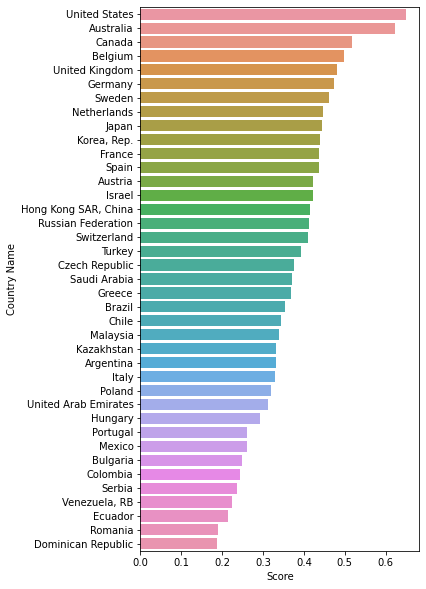

In [167]:
#plot des score
plt.figure(figsize = (5, 10))
sns.barplot(data = cleaned_data_scoring, x = "Score",  y= "Country Name" )

Les pays les mieux classés sont Etas Unis, Australie et Canada

### 3.2.2 Discussion 

Tout d'abord, pour vérifier la pertinence du classement, j'ai examiné les données non normalisées pour les 3 pays les mieux classés.

In [168]:
#3 meilleur pays
top_3 = cleaned_data_scoring.head(3)["Country Name"].values

In [169]:
#données non normalisées pour les 3 meilleurs pays
cleaned_data[cleaned_data["Country Name"].isin(top_3)]

,Country Name,GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 10-18, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Country Code,Region
1,Australia,49927.819509,90.306503,186.427887,88.238658,1.410064,2440747.0,2914620.0,24127159.0,7.89545,4.26626,12.5,14.1,AUS,East Asia & Pacific
6,Canada,42157.927991,85.795776,119.053093,89.840000,1.213891,3479681.0,4373511.0,36286425.0,6.59589,4.46825,11.2,13.7,CAN,North America
37,United States,57638.159088,85.795776,93.286598,76.176737,0.692801,38835370.0,45147517.0,323127513.0,5.83450,4.46825,10.0,12.7,USA,North America


Aux Etats Unis, le gross enrollement ratio au lycée, le taux de croissance de la population et la school life expectancy sont inférieures à Australie et Canada. Cependant il dépassent largement Australie et Canada en termes de population et population jeune - autour de 10 fois, ce qui se reflète dans le score global.

Afin de vérifier la fiabilité du score, pour les 10 pays mieux classés, j'ai aussi comparé les données non normalisées (qui dataient de 2016 au maximum) avec des donnés plus récentes. 

In [170]:
#10 pays mieux classés
ten_best = cleaned_data_scoring.iloc[:10, 0].values
ten_best

array(['United States', 'Australia', 'Canada', 'Belgium',
       'United Kingdom', 'Germany', 'Sweden', 'Netherlands', 'Japan',
       'Korea, Rep.'], dtype=object)

In [171]:
#données non normalisées pour le 1à pays mieux classés
cleaned_data_ten_best = cleaned_data[cleaned_data["Country Name"].isin(ten_best)]

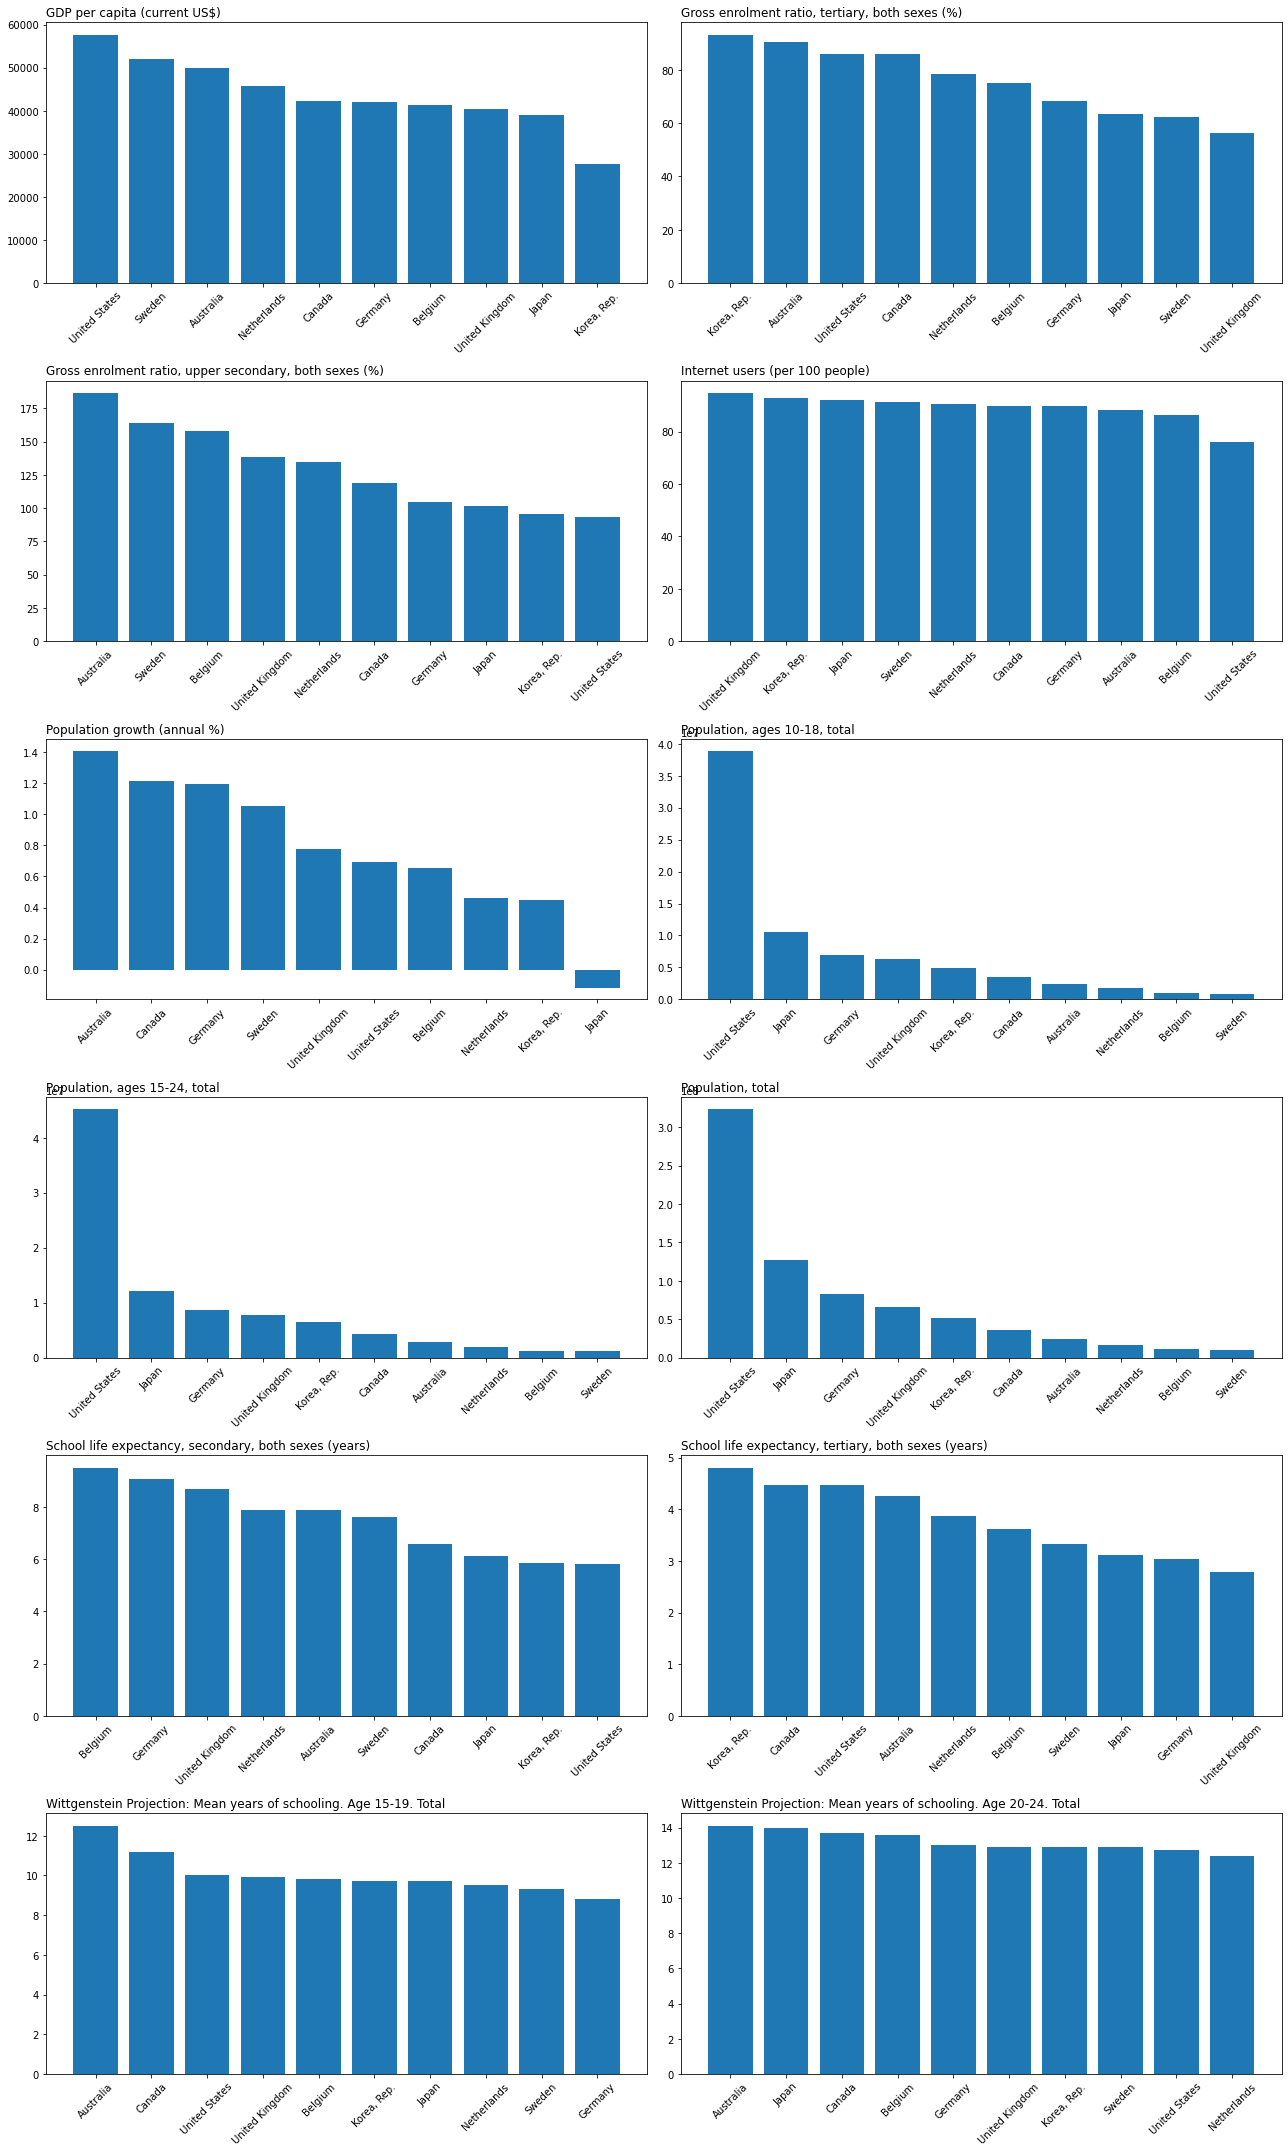

In [172]:
fig, ax = plt.subplots(6, 2, figsize =(18, 30))

count = 1
for col in cleaned_data_ten_best.columns[1:-2]:
    plt.subplot(6,2,count)
    plt.xticks(rotation = 45)
    plt.title(col, loc = 'left')
    cleaned_data_ten_best = cleaned_data_ten_best.sort_values(col, ascending=False)
    plt.bar(cleaned_data_ten_best["Country Name"], cleaned_data_ten_best[col] )
    count+=1
fig.tight_layout()
plt.show()

En vérifiant sur plusieurs sites de statistiques/données on peut voir que :
- En 2020/2021 le pays avec le PIB pour habitant le plus élevé sont les Etas Unis. Le classement réalisé à partir des données 2012-2016 correspond presque au classement de 2020/2021: la différence est que la Belgique a dépassé l'Allemagne 
https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?most_recent_value_desc=true
- le classement pour le "gross enrollement, tertiary"  correspond presque au classement actuel - en 2019/2020 l'Australie a depassé la Korée du Sud et la Suede a dépassé l’Allemagne
    https://data.worldbank.org/indicator/SE.TER.ENRR?most_recent_value_desc=true&view=map&year=2021 
- pour le "gross enrollement ratio, secondary", Australie, Suède et Belgique occupent toujours le podium en 2019/2020, mais avec un ordre légèrement diffèrent : Belgique, Suède et Australie 
    https://data.worldbank.org/indicator/SE.SEC.ENRR?most_recent_value_desc=true&view=map&year=2021
- dans les pays sélectionnés, qui font partie des pays le plus développés au monde, le pourcentage d’utilisateurs internet est très élève en 2020 (au dessus de 90%). Cependant, entre 2015 et 2020, le pourcentage au niveau global a augmenté de 40%. Il n'est pas à exclure que, en utilisant des données plus recentes, d'autres pays auraient pu rentrer dans la top ten.  
https://data.worldbank.org/indicator/IT.NET.USER.ZS?most_recent_value_desc=true
- le taux de croissance de la population a nettement diminué (mais on ne peut pas exclure un effet temporaire du à la crise sanitaire liée à la Covid)
  https://data.worldbank.org/indicator/SP.POP.GROW?view=map&year=2021
- les Etats unis dépassent largement les autres pays en termes de population
- en ce qui concerne la school life expectancy, je n’ai pas pu trouver des données plus récentes pour la comparaison

Compte tenu de ces comparaisons, il est raisonnable d’affirmer que  **ces indicateurs peuvent informer les décisions d'ouverture vers de nouveaux pays**


## 3.3 Evolution du potentiel 
Je vais examiner, pour les 10 pays avec le meilleur score, l'évolution qu'on pourrait avoir d'ici 10-15 ans.
Tout t'abord, je vais considérer le taux de croissance. Je vais également considérer les valeurs du dataset nettoyé et non normalisé. 

In [173]:
# 10 meilleur pays
ten_best

array(['United States', 'Australia', 'Canada', 'Belgium',
       'United Kingdom', 'Germany', 'Sweden', 'Netherlands', 'Japan',
       'Korea, Rep.'], dtype=object)

In [174]:
#valeurs originale
ten_best_original_values = cleaned_data.loc[cleaned_data["Country Name"].isin(ten_best)]
ten_best_original_values[["Country Name", "Population growth (annual %)"]].sort_values("Population growth (annual %)", ascending = False)

,Country Name,Population growth (annual %)
1,Australia,1.410064
6,Canada,1.213891
13,Germany,1.193867
32,Sweden,1.055074
36,United Kingdom,0.777542
37,United States,0.692801
3,Belgium,0.653895
24,Netherlands,0.462244
21,"Korea, Rep.",0.451318
19,Japan,-0.115284


Sauf pour le Japan le taux de croissance est positif, et meme > 1 pour 4 pays, dont Canada et Australie

Ensuite, je vais regarder le Wittgenstein projection pour connaitre l'évolution du nombre moyen d’années passées à l'école.

In [175]:
data = pd.read_csv("Data\Source\EdstatsData.csv")

In [176]:
#selection des Wittgenstein projections pour les meilleurs 15 pays
data_witt_top10 = data.loc[(data["Country Name"].isin(ten_best))&data["Indicator Name"].isin(["Wittgenstein Projection: Mean years of schooling. Age 15-19. Total","Wittgenstein Projection: Mean years of schooling. Age 20-24. Total"])]
data_witt_top10.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
780341,Sweden,SWE,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,13.3,13.3,13.3,13.4,13.4,13.4,13.4,13.4,13.5,NaN
358863,Germany,DEU,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,9.3,9.4,9.5,9.5,9.6,9.6,9.6,9.7,9.7,NaN
849973,United States,USA,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,10.3,10.3,10.3,10.4,10.4,10.4,10.4,10.5,10.5,NaN
604421,Netherlands,NLD,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,13.0,13.1,13.1,13.2,13.2,13.2,13.3,13.3,NaN
160956,Belgium,BEL,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,13.9,14.0,14.0,14.0,14.0,14.1,14.1,14.1,14.1,NaN


In [177]:
#selection des Wittgenstein projections pour les meilleurs 15 pays et les années entre 2015 et 2035
data_witt_2015 = data_witt_top10.loc[:, ["Country Name", "Indicator Name", "2015", "2020", "2025", "2030", "2035"]]
data_witt_2015 = data_witt_2015.reset_index(drop = True)
data_witt_2015

,Country Name,Indicator Name,2015,2020,2025,2030,2035
0,Australia,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,12.3,12.4,12.4,12.5,12.5
1,Australia,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,13.8,13.9,14.0,14.1,14.1
2,Belgium,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,9.6,9.7,9.8,9.8,9.9
3,Belgium,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,13.2,13.3,13.5,13.6,13.7
4,Canada,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,11.0,11.1,11.2,11.2,11.3
5,Canada,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,13.6,13.6,13.7,13.7,13.8
6,Germany,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,8.4,8.5,8.6,8.8,8.9
7,Germany,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,12.7,12.8,12.9,13.0,13.0
8,Japan,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,9.5,9.6,9.7,9.7,9.7
9,Japan,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,13.7,13.8,13.9,14.0,14.0


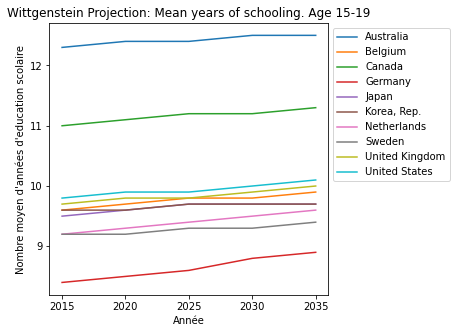

In [178]:
#plot des Wittgenstein projection Mean years of schooling. Age 15-19. 
plt.figure(figsize= (5, 5))
for i in range(0, data_witt_2015.shape[0], 2):
    plt.plot(["2015", "2020", "2025", "2030", "2035"], data_witt_2015.iloc[i, 2:].values, label = data_witt_2015.loc[i, "Country Name"] )
plt.title("Wittgenstein Projection: Mean years of schooling. Age 15-19") 
plt.xlabel("Année")
plt.ylabel("Nombre moyen d'années d'education scolaire")
plt.legend(bbox_to_anchor=(1,1))

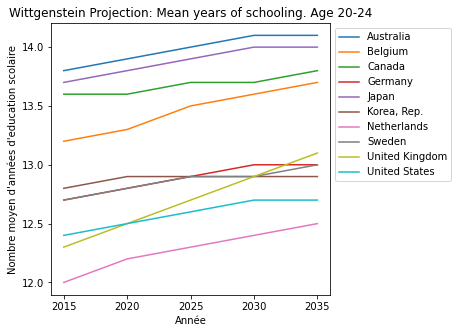

In [179]:
#plot des Wittgenstein projection Mean years of schooling. Age 20-24. 
plt.figure(figsize= (5, 5))
for i in range(1, data_witt_2015.shape[0], 2):
    plt.plot(["2015", "2020", "2025", "2030","2035"], data_witt_2015.iloc[i, 2:].values, label = data_witt_2015.loc[i, "Country Name"] )
plt.title("Wittgenstein Projection: Mean years of schooling. Age 20-24") 
plt.xlabel("Année")
plt.ylabel("Nombre moyen d'années d'education scolaire")
plt.legend(bbox_to_anchor=(1,1))

Comme on peut le voir, le nombre moyen d'années d'education va continuer à monter, ce qui implique une croissance continue des clients potentiels.

# 4. Conclusion

A partir du dataset qui contenait les valeurs d’indicateurs, j'ai réalisé plusieurs étapes de filtrage afin de sélectionner les donnes pouvant informer le projet d'expansion commerciale.
Notamment ces étapes ont été :
- filtre sur le années pour avoir des information récentes et des prévisions à l'horizon 2030  (des 2012 à 2017 + 2030)
- sélection d'indicateurs potentiellement pertinents (pourcentage des jeunes à l’école, population jeune, population totale, etc.)
- prise en compte de la valeur mesurée la plus recente
- filtre sur la taille de la population( minimum 6.3 millions, c’est-à-dire la médiane)
- filtre sur le PIB par habitant ( minimum 5355 dollars, c’est-à-dire la médiane)
- filtre sur le nombre d'utilisateurs Internet
- élimination des indicateurs avec trop des valeurs manquantes (plus que le 25% du total)
- remplacement des valeurs manquantes avec la médiane par région géographique

Une fois le dataset nettoyé, j'ai calculé un score avec la moyenne pondérée des indicateurs. 
 
Une comparaison des valeurs des indicateurs avec des données plus récentes (2019-2020-2021) a permis de voir que **les valeurs utilisées, même si les plus récentes datent de 2016, représentent bien les tendances actuelles**. 

Les **Etats Unis, Canada, et Australie** sont en tête du classement. Ces 3 pays ont également une croissance démographique positive et **on s'attend que le nombre moyen d’années passées à l'école continue à grandir**. Cela implique un nombre grandissant de potentiels clients

Enfin, pour les pays à fort potentiels identifiés, il faudrait réaliser une étude de marché afin d'identifier les concurrents, ou encore étudier les habitudes de la population et leurs intérêts afin de mieux adapter l'offre, les cours proposés et identifier le meilleur business model à adopter.


